In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Data Analysis

In [6]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
train_df[train_df['Sex']=='female']['Survived'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [9]:
train_df[train_df['Sex']=='male']['Survived'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [10]:
train_df[train_df['Survived']==1]['Age'][train_df['Sex']=='female'].mean()

28.84771573604061

In [11]:
train_df[train_df['Survived']==0]['Age'][train_df['Sex']=='female'].mean()

25.046875

In [12]:
train_df[train_df['Survived']==1]['Age'][train_df['Sex']=='male'].mean()

27.276021505376345

In [13]:
train_df[train_df['Survived']==0]['Age'][train_df['Sex']=='male'].mean()

31.618055555555557

#### EDA 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

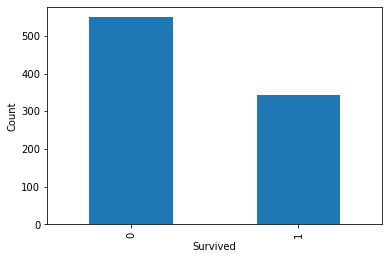

In [16]:
train_df['Survived'].value_counts().plot( kind = 'bar' ,  label = 'Survived')
plt.xlabel ( 'Survived' ) 
plt.ylabel ( 'Count' )

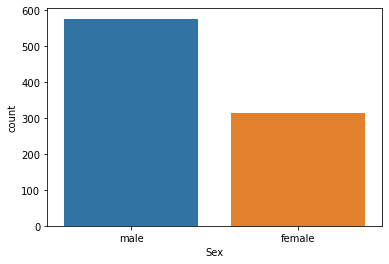

In [17]:
sns.countplot(x = train_df['Sex'] , data=train_df)

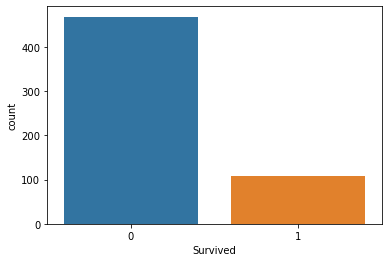

In [18]:
men = train_df['Sex']=='male'
sns.countplot(x = train_df[men]['Survived'] , data=train_df)

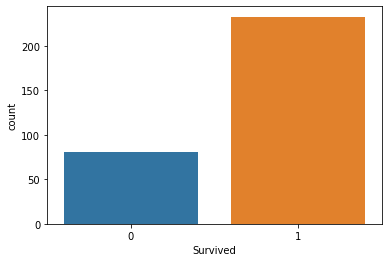

In [19]:
women = train_df['Sex']=='female'
sns.countplot(x = train_df[women]['Survived'] , data=train_df)

#### Fill missing data

In [20]:
age_mean1 = train_df['Age'].mean()
age_mean2 = test_df['Age'].mean()

In [21]:
train_df['Age']=train_df['Age'].fillna(age_mean1)
test_df['Age']=test_df['Age'].fillna(age_mean2)


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
a = train_df.assign(age_group=pd.cut(train_df['Age'],[0,15,25,50,100],labels=['Kid','Teen','Adult','Senior']))

In [92]:
b = test_df.assign(age_group=pd.cut(test_df['Age'],[0,15,25,50,100],labels=['Kid','Teen','Adult','Senior']))

In [25]:
train_df['Age_Group'] = a['age_group']
test_df['Age_Group'] = b['age_group']

In [26]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Teen
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Teen
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Adult


In [27]:
train_df['Age_Group'].describe()

count       891
unique        4
top       Adult
freq        526
Name: Age_Group, dtype: object

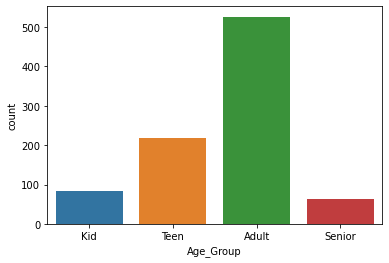

In [28]:
sns.countplot(x = train_df['Age_Group'] , data=train_df)

In [29]:
#  axes  =  plt . subplots ( 1 ,  2 ,  figsize = ( 14 , 5 )) 

# kid = train_df['Age_Group']=='Kid'

# gender = train_df[kid]['Sex']

# sns.countplot(x = train_df[kid]['Survived'] , data=train_df,ax=axes[1])

In [30]:
kids= train_df[train_df['Age_Group']=='Kid']
kids_boys = kids[kids['Sex']=='male']
kids_girls = kids[kids['Sex']=='female']

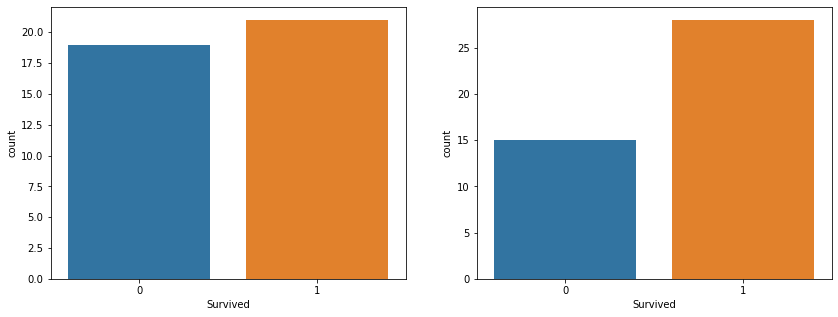

In [31]:
_,axes  =  plt . subplots ( 1 ,  2,  figsize = ( 14 , 5 )) 
sns.countplot(x = kids_boys['Survived'] , data=train_df, ax=axes[0])
sns.countplot(x = kids_girls['Survived'] , data=train_df)

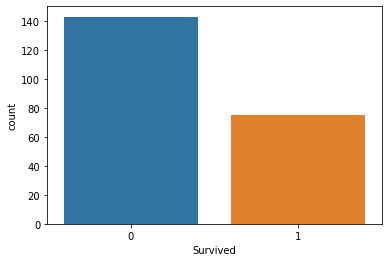

In [32]:
teen = train_df['Age_Group']=='Teen'
sns.countplot(x = train_df[teen]['Survived'] , data=train_df)

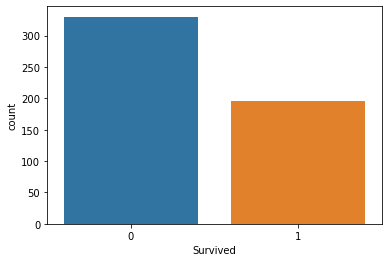

In [33]:
adult = train_df['Age_Group']=='Adult'
sns.countplot(x = train_df[adult]['Survived'] , data=train_df)

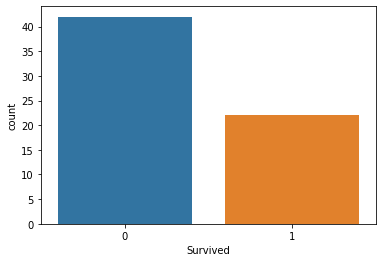

In [34]:
senior = train_df['Age_Group']=='Senior'
sns.countplot(x = train_df[senior]['Survived'] , data=train_df)

In [35]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [36]:
# b = train_df.assign(fare_group=pd.cut(train_df['Fare'],[0,8,16,50,512],labels=['Kid','Teen','Adult','Senior']))

In [37]:
train_df['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

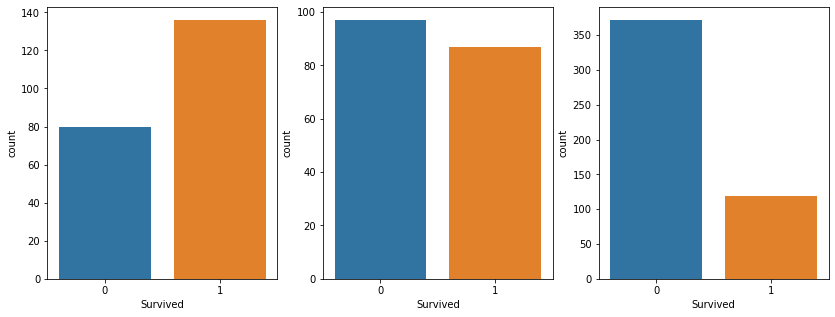

In [38]:
_,axes  =  plt . subplots ( 1 ,  3,  figsize = ( 14 , 5 )) 
class1=train_df[train_df['Pclass']==1]
class2=train_df[train_df['Pclass']==2]
class3=train_df[train_df['Pclass']==3]
sns.countplot(x = class1['Survived'], data=train_df, ax=axes[0])
sns.countplot(x = class2['Survived'], data=train_df, ax=axes[1])
sns.countplot(x = class3['Survived'], data=train_df, ax=axes[2])


In [39]:
train_df['Age_Group'].fillna('Adult')
test_df['Age_Group'].fillna('Adult')

0       Adult
1       Adult
2      Senior
3       Adult
4        Teen
        ...  
413     Adult
414     Adult
415     Adult
416     Adult
417     Adult
Name: Age_Group, Length: 418, dtype: category
Categories (4, object): [Kid < Teen < Adult < Senior]

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age_Group    891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


#### One hot encoding

In [41]:
from sklearn.preprocessing import LabelBinarizer

lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(train_df["Age_Group"])
pd.DataFrame(lb_results, columns=lb_style.classes_)

lb_style1 = LabelBinarizer()
lb_results1 = lb_style1.fit_transform(test_df["Age_Group"])
pd.DataFrame(lb_results1, columns=lb_style1.classes_)

,Adult,Kid,Senior,Teen
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
413,1,0,0,0
414,1,0,0,0
415,1,0,0,0
416,1,0,0,0


In [42]:
# frames = [train_df,lb_results]
lb_new_results = pd.DataFrame(lb_results, columns=lb_style.classes_)
frames = [train_df,lb_new_results]
train_df=pd.concat(frames,axis=1)

lb_new_results1 = pd.DataFrame(lb_results1, columns=lb_style1.classes_)
frames1 = [test_df,lb_new_results1]
test_df=pd.concat(frames1,axis=1)

In [43]:
train_df=train_df.drop('Age_Group',axis=1)
test_df=test_df.drop('Age_Group',axis=1)

In [44]:
train_df=train_df.drop('Embarked',axis=1)
test_df=test_df.drop('Embarked',axis=1)

In [45]:
X_train = train_df.drop('Survived',axis=1)
Y_train = train_df['Survived']

In [46]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Adult,Kid,Senior,Teen
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,0,0,0


In [47]:
X_train.shape, Y_train.shape

((891, 14), (891,))

#### Training data with different models

In [48]:
logit = LogisticRegression(C=1 , random_state=17,max_iter=10000)

In [49]:
X_test = test_df

In [50]:
X_train['Sex'] = X_train['Sex'].map( {'male':1, 'female':0} )
X_test['Sex'] = X_test['Sex'].map( {'male':1, 'female':0} )

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Adult        891 non-null    int32  
 11  Kid          891 non-null    int32  
 12  Senior       891 non-null    int32  
 13  Teen         891 non-null    int32  
dtypes: float64(2), int32(4), int64(5), object(3)
memory usage: 83.7+ KB


In [52]:
X_train_gender = X_train
X_test_gender = X_test


In [53]:
X_train_name =X_train_gender.drop('Name',axis=1)
X_test_name =X_test_gender.drop('Name',axis=1)

In [54]:
X_train_ticket =X_train_name.drop('Ticket',axis=1)
X_test_ticket =X_test_name.drop('Ticket',axis=1)

In [55]:
X_train_cabin =X_train_ticket.drop('Cabin',axis=1)
X_test_cabin =X_test_ticket.drop('Cabin',axis=1)

In [56]:
X_train_cabin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Adult        891 non-null    int32  
 8   Kid          891 non-null    int32  
 9   Senior       891 non-null    int32  
 10  Teen         891 non-null    int32  
dtypes: float64(2), int32(4), int64(5)
memory usage: 62.8 KB


In [57]:
logit = LogisticRegression(C=1 , random_state=17,max_iter=10000)

In [58]:
cv_scores=cross_val_score(logit, X_train_cabin,Y_train,cv=5, scoring='roc_auc')

In [59]:
cv_scores.mean()

0.8531050242920536

In [60]:
logit.fit(X_train_cabin,Y_train)

LogisticRegression(C=1, max_iter=10000, random_state=17)

In [61]:
X_test_cabin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Adult        418 non-null    int32  
 8   Kid          418 non-null    int32  
 9   Senior       418 non-null    int32  
 10  Teen         418 non-null    int32  
dtypes: float64(2), int32(4), int64(5)
memory usage: 29.5 KB


In [62]:
X_train_cabin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Adult        891 non-null    int32  
 8   Kid          891 non-null    int32  
 9   Senior       891 non-null    int32  
 10  Teen         891 non-null    int32  
dtypes: float64(2), int32(4), int64(5)
memory usage: 62.8 KB


In [63]:
fare_mean = X_test_cabin['Fare'].mean()

In [64]:
X_test_cabin['Fare'] = X_test_cabin['Fare'].fillna(fare_mean)

In [65]:
X_test_cabin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Adult        418 non-null    int32  
 8   Kid          418 non-null    int32  
 9   Senior       418 non-null    int32  
 10  Teen         418 non-null    int32  
dtypes: float64(2), int32(4), int64(5)
memory usage: 29.5 KB


In [66]:
logit = LogisticRegression(C=1 , random_state=17,max_iter=10000)

In [67]:
cv_scores=cross_val_score(logit, X_train_cabin,Y_train,cv=5, scoring='roc_auc')

In [68]:
logit.fit(X_train_cabin,Y_train)

LogisticRegression(C=1, max_iter=10000, random_state=17)

In [69]:
test_pred_logit1 = logit.predict_proba(X_test_cabin)[:,1]

In [70]:
test_pred_logit1

array([0.10055922, 0.39476128, 0.10592494, 0.13123179, 0.45831914,
       0.34106657, 0.66447931, 0.2026895 , 0.64044817, 0.04570214,
       0.11685701, 0.36291414, 0.90485954, 0.07298153, 0.85795391,
       0.7296263 , 0.23398099, 0.09643206, 0.59158187, 0.52185864,
       0.25222154, 0.34190005, 0.94160106, 0.45413063, 0.88422919,
       0.03872016, 0.92238274, 0.09141686, 0.41439404, 0.05547845,
       0.10337729, 0.10702417, 0.45993598, 0.48972912, 0.44128503,
       0.10552006, 0.66280412, 0.6143277 , 0.0842398 , 0.13819882,
       0.07466485, 0.516217  , 0.07969913, 0.84718681, 0.86360667,
       0.08379419, 0.37598393, 0.11700901, 0.87131225, 0.53410655,
       0.36151897, 0.29813456, 0.62937399, 0.89425316, 0.27215929,
       0.08904567, 0.09907866, 0.08376229, 0.08156014, 0.96952494,
       0.11166458, 0.25731353, 0.10774589, 0.60435292, 0.76476651,
       0.84998497, 0.64177188, 0.36935373, 0.51132927, 0.82132822,
       0.58535411, 0.0969223 , 0.67432014, 0.53533064, 0.96445

In [71]:
i=0
for i in range(test_pred_logit1.shape[0]):
    if(test_pred_logit1[i]<=0.5):
        test_pred_logit1[i]=0
    else:
        test_pred_logit1[i]=1

In [72]:
test_pred_logit1

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [73]:
y_pred = logit.predict(X_test_cabin)

In [74]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Adult,Kid,Senior,Teen
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,1,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,0,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0,0,0,1


In [75]:
first=X_test['PassengerId'][0]

In [76]:
last=X_test['PassengerId'][X_test.shape[0]-1]

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
def write_to_sub_file(start_passenger_id,end_passenger_id,predicted_labels,out_file,target='Survived',index_label='PassengerId'):
    predicted_df = pd.DataFrame(predicted_labels, index = np.arange(start_passenger_id, end_passenger_id+1),
                               columns=[target])
    predicted_df.to_csv(out_file,index_label=index_label)

In [79]:
write_to_sub_file(first , last,test_pred_logit1,'logit_sub1.csv')

In [80]:
c_values = np.logspace(-2, 2, 10)

In [81]:
from sklearn.model_selection import GridSearchCV
logit_grid_searcher = GridSearchCV(estimator=logit, param_grid={'C': c_values},
                                  scoring='roc_auc', n_jobs=1, cv=5, verbose=1)

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
forest = RandomForestClassifier(n_estimators=200, 
                                n_jobs=-1, random_state=17)

In [88]:
forest.fit(X_train_cabin, Y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=17)

In [89]:
test_pred_logit3 = forest.predict_proba(X_test_cabin)[:,1]

In [90]:
i=0
for i in range(test_pred_logit3.shape[0]):
    if(test_pred_logit3[i]<=0.5):
        test_pred_logit3[i]=0
    else:
        test_pred_logit3[i]=1

In [91]:
write_to_sub_file(first , last,test_pred_logit3,'logit_sub3.csv')